# Data Visualization on Exchange Rates

In this small project the Euro exchange rates between 1999 and 2021 should be examined. The source of the dataset is the European Cnetral Bank and it was put together by Daria Chemkaeva and made available on [kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020).

## Basic data exploratory

First the dataset is read in and examined:

In [12]:
import pandas as pd

# read in the dataset
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

The first and last five rows are inspected:

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


Furthermore basic facts about the dataset can be explored by:

In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

The dataset consists of `5699` rows and `41` columns with no null values. The datatypes are a mixture of `float64` and `strings`.

## Data Cleaning

First some basic data cleaning is performed. 
The entries `[US dollar ]` and `Period\Unit` are renamed to `US_dollar` and `Time`.
The new `Time` column is transformed from `object` to `datetime` format and sorted in ascending order. Finally the index is resetted:

In [14]:
# renaming
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                                inplace=True)
# transform to datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
# sort in ascending order
exchange_rates.sort_values('Time', inplace=True)
# reset the index
exchange_rates.reset_index(drop=True, inplace=True)

In the following only the exchange rate between euro and dollar is of interest, so the accompanied entries are extracted and stored in a new `dataframe`:

In [6]:
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()

The reduced dataset is examined:

In [7]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

There are 62 entries without information (`-`) which will be removed in the following:

In [15]:
# create a list of the rows to be dropped by boolean indexing
droplist = euro_to_dollar[euro_to_dollar['US_dollar'] == '-'].index.to_list()
# drop the rows
euro_to_dollar = euro_to_dollar.drop(droplist)

Finally the `US_dollar` entries are converted fo `float` datatype:

In [9]:
euro_to_dollar = euro_to_dollar.astype({'US_dollar':'float'})

## Visualisation

Now the dataset can be plotted:

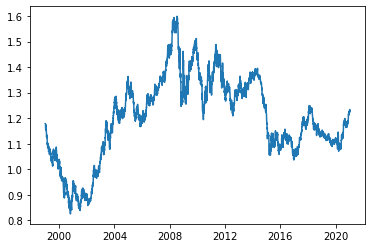

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

It can be observed, that the plot is very noisy. This results from the daily fluctuation of the exchange rate. If just the long term trends are of interest, then the dataset can be smoothed by the `rolling mean` method:

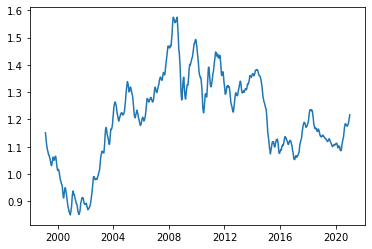

In [16]:
# set the rolling window to 30:
rolling_mean = euro_to_dollar['US_dollar'].rolling(30).mean()
# plot the filtered data:
plt.plot(euro_to_dollar['Time'][29:],
         rolling_mean[29:])
plt.show()

## Summary

This concludes this short project. A dataset about the US Dollar exchange rates was read in, cleaned and plotted for the Euro to US Dollar exchange rate. 